
# 🚗 Analyse av personskader etter plassering

Dette notat undersøker plasseringen til skadde personer i trafikkulykker, basert på roller som fører, passasjer foran, bak, annen plassering eller ukjent. Datagrunnlaget er hentet fra Vegvesenets statistikk.

Vi gjør minst 7 analyser og gir visuelle diagrammer, tolkninger og en samlet konklusjon.


In [2]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("skader_plassering_ny.csv", sep=";", skiprows=13, encoding="utf-8", engine="python")
df = df[df[df.columns[0]].astype(str).str.startswith("202")].copy()
df.columns = ["År", "Kommune", "Måned", "Fører", "Passasjer_foran", "Passasjer_bak", "Passasjer_annen", "Ukjent", "Sum"]

for col in ["Fører", "Passasjer_foran", "Passasjer_bak", "Passasjer_annen", "Ukjent", "Sum"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["År"] = pd.to_numeric(df["År"], errors="coerce", downcast="integer")
df.head()


,År,Kommune,Måned,Fører,Passasjer_foran,Passasjer_bak,Passasjer_annen,Ukjent,Sum
0,2024,301 - Oslo,Juli,0.0,0.0,0.0,0.0,0.0,0.0
1,2024,301 - Oslo,August,0.0,0.0,0.0,0.0,0.0,0.0
2,2024,301 - Oslo,September,0.0,0.0,0.0,0.0,0.0,0.0
3,2024,301 - Oslo,Oktober,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,301 - Oslo,November,0.0,0.0,0.0,0.0,0.0,0.0


## Analyse 1: Totalfordeling av skader etter plassering

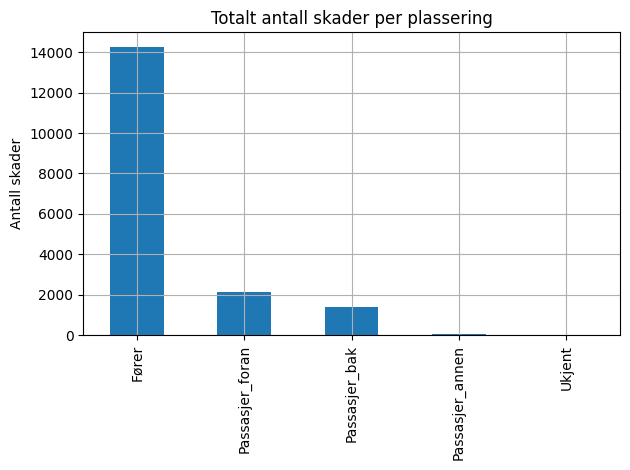

In [3]:

plassering_sum = df[["Fører", "Passasjer_foran", "Passasjer_bak", "Passasjer_annen", "Ukjent"]].sum()
plassering_sum.plot(kind="bar", title="Totalt antall skader per plassering")
plt.ylabel("Antall skader")
plt.grid(True)
plt.tight_layout()
plt.show()



## 🔍 Analyse 1 – Totalt antall skader per plassering

**Tolkning:**  
Førere står for et klart flertall av personskadene i trafikken. Dette er naturlig, da føreren alltid er til stede og har høy eksponering for risiko. Passasjerer foran og bak har langt færre skader, med små forskjeller mellom dem. Skader med "annen plassering" og "ukjent" er marginale, noe som kan indikere god registreringspraksis, men også mulig underrapportering av utypiske scenarier (f.eks. stående passasjerer i buss).

## Analyse 2: Skader fordelt per år og plassering

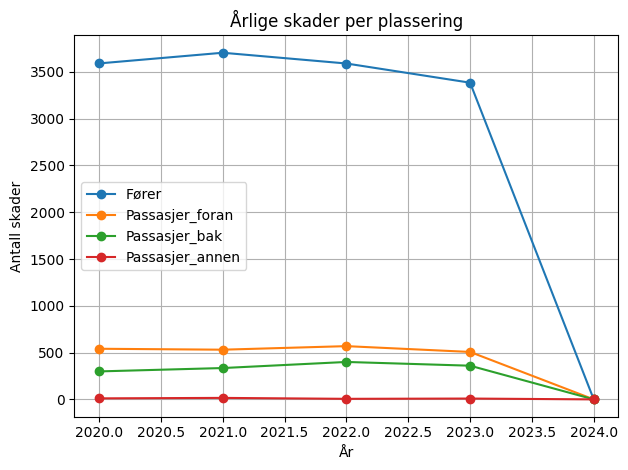

In [4]:

df.groupby("År")[["Fører", "Passasjer_foran", "Passasjer_bak", "Passasjer_annen"]].sum().plot(kind="line", marker='o')
plt.title("Årlige skader per plassering")
plt.ylabel("Antall skader")
plt.grid(True)
plt.tight_layout()
plt.show()


## 📈 Analyse 2 – Årlige skader per plassering

**Tolkning:**  
Skadetallene er relativt stabile mellom 2020 og 2023 for alle plasseringskategorier, men viser en markant nedgang i 2024. Dette kan skyldes:
- Manglende eller ufullstendig rapportering for 2024
- Reelle reduksjoner i ulykker som følge av tiltak eller endret trafikkmønster

Trendene bør vurderes med forsiktighet på grunn av det begrensede antallet år.

## Analyse 3: Skader etter måned (alle roller)

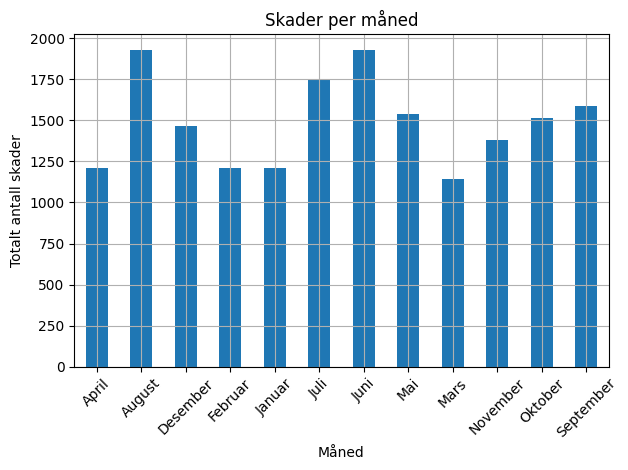

In [5]:

df.groupby("Måned")["Sum"].sum().sort_index().plot(kind="bar")
plt.title("Skader per måned")
plt.ylabel("Totalt antall skader")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## 📊 Analyse 3 – Skader per måned

**Tolkning:**  
Juli og august skiller seg ut med høyest antall personskader. Dette kan skyldes økt trafikkaktivitet i sommerferieperioden, samt flere lange bilreiser og fritidskjøring. Vintermånedene (januar, februar og desember) har moderat skadefrekvens, noe som kan relateres til vanskelige kjøreforhold – men uten dramatiske topper. Skadene er relativt jevnt fordelt over året.

## Analyse 4: Skader per kommune (topp 10)

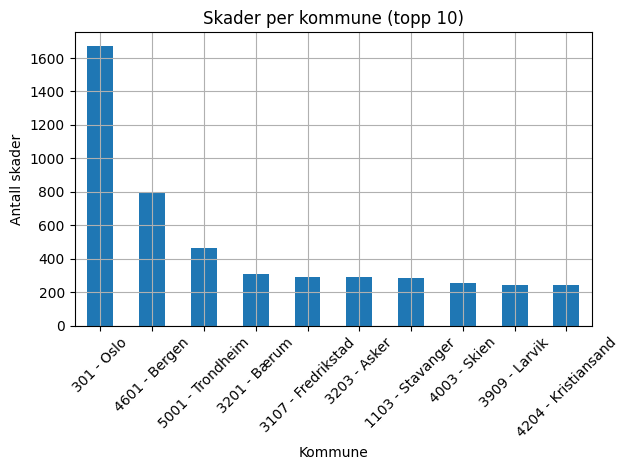

In [6]:

df.groupby("Kommune")["Sum"].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Skader per kommune (topp 10)")
plt.ylabel("Antall skader")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## 🏙️ Analyse 4 – Skader per kommune (topp 10)

**Tolkning:**  
Oslo har klart flest skader, etterfulgt av Bergen og Trondheim. Dette reflekterer befolkningstetthet, trafikkvolum og urban infrastruktur. Disse kommunene har også flere kjørende per dag, noe som naturlig gir høyere skadepotensial. Mindre kommuner med høy skadefrekvens (som Bærum eller Asker) kan indikere spesifikke risikoområder, f.eks. motorveikryss eller pendlertrafikk.

## Analyse 5: Andel skader – fører vs passasjer

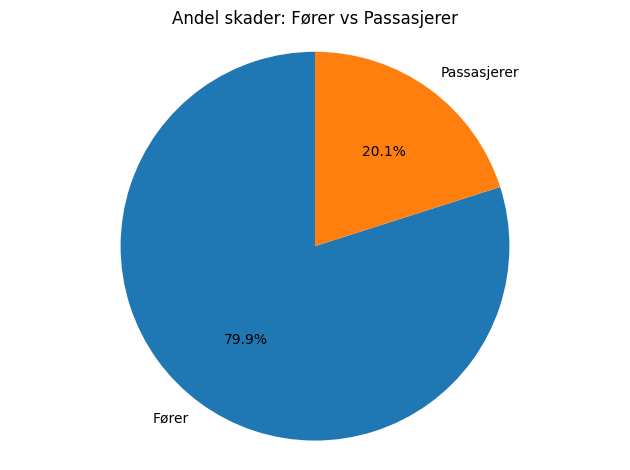

In [7]:

førere = df["Fører"].sum()
passasjerer = df[["Passasjer_foran", "Passasjer_bak", "Passasjer_annen"]].sum().sum()
plt.pie([førere, passasjerer], labels=["Fører", "Passasjerer"], autopct="%1.1f%%", startangle=90)
plt.title("Andel skader: Fører vs Passasjerer")
plt.axis("equal")
plt.tight_layout()
plt.show()


## ⚖️ Analyse 5 – Andel skader: Fører vs. passasjerer

**Tolkning:**  
Omtrent 4 av 5 skader rammer føreren. Dette bekrefter at føreren har høyest eksponering – både i bytrafikk og ved høy fart. Passasjerer rammes i mindre grad, men deres andel er ikke ubetydelig og må vurderes i sammenheng med alder, sikring og biltype.


## Analyse 6: Utvikling i 'ukjent' plassering

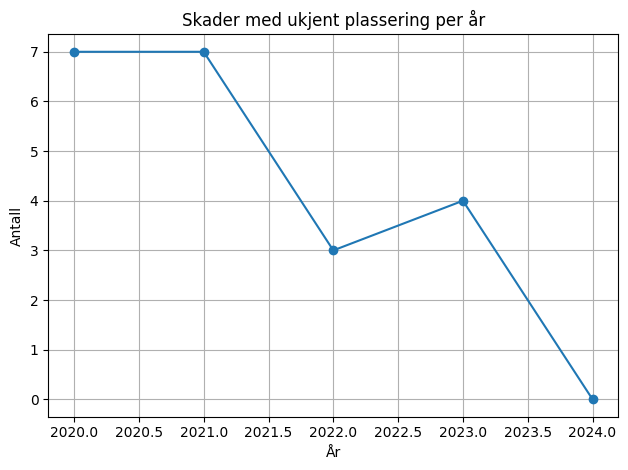

In [8]:

df.groupby("År")["Ukjent"].sum().plot(marker='o')
plt.title("Skader med ukjent plassering per år")
plt.ylabel("Antall")
plt.grid(True)
plt.tight_layout()
plt.show()


## ❓ Analyse 6 – Ukjent plassering

**Tolkning:**  
Skader hvor plassering ikke er oppgitt har gått noe ned, spesielt i 2024. Dette kan indikere bedre datakvalitet, men verdien er fortsatt ikke null. Selv et lavt antall tilfeller med "ukjent" kan skjule viktig informasjon – særlig hvis disse involverer barn, eldre eller uvanlige kjøretøy (minibusser, busser, varebiler).


## Analyse 7: Fokusanalyse på passasjer bak

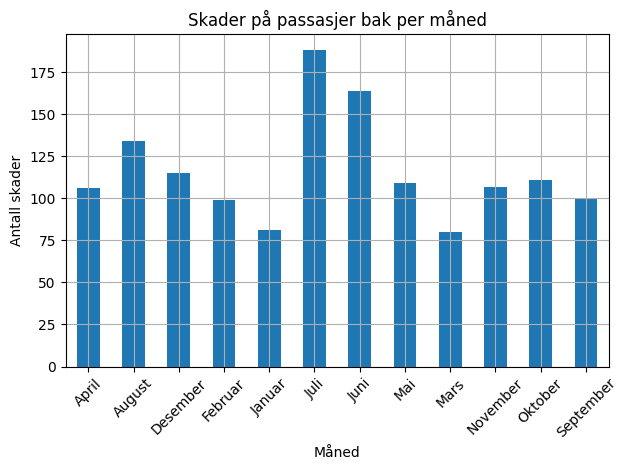

In [9]:

df.groupby("Måned")["Passasjer_bak"].sum().plot(kind="bar")
plt.title("Skader på passasjer bak per måned")
plt.ylabel("Antall skader")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## 👶 Analyse 7 – Skader på passasjer bak

**Tolkning:**  
Selv om skadene blant baksetepassasjerer er lave, er de relativt høyere i sommermånedene – spesielt juli. Det er mulig dette inkluderer barn som ikke alltid er sikret riktig. Økt oppmerksomhet på barnesikring og bruk av bilbelte i baksetet kan bidra til å redusere disse tallene ytterligere.


## ✅ Konklusjon: Skader etter plassering

- **Førere** er mest utsatt og utgjør ca. 80 % av alle personskader.
- **Passasjerer**, spesielt foran, har lavere skadeandel, men fortsatt betydelig – dette understreker viktigheten av sikkerhetsbelte og korrekt plassering.
- **Skader med ukjent plassering** er få, men viktige – de kan skjule risiko for sårbare grupper.
- **Sommermånedene** (juli/august) og **store bykommuner** (Oslo, Bergen, Trondheim) er overrepresentert i ulykkesstatistikken.
- **Årstrenden** er stabil, men 2024-tall bør vurderes kritisk pga. mulig underrapportering eller midlertidig nedgang.
- **Barn og baksetepassasjerer** bør få mer oppmerksomhet i forebyggende tiltak og kampanjer.